# Linear Regression

## Imports

In [39]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import torch

## Load data

Define the path to the file containing the data

In [40]:
datafile = "lausanne-appart.csv"

Read the data

In [41]:
dataset = pd.read_csv(datafile)

Display first rows

In [42]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [43]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

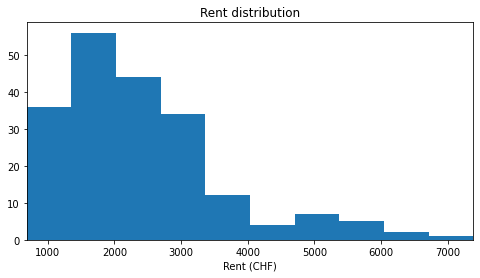

In [44]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

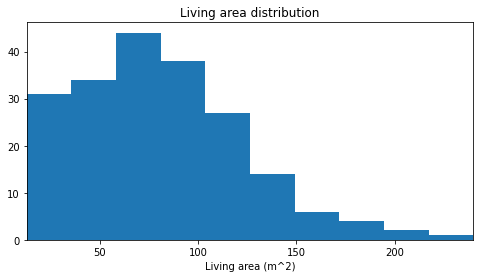

In [45]:
# Your code here
plt.figure(2, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living area (m^2)")
plt.title("Living area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

(685.0, 7383.0)

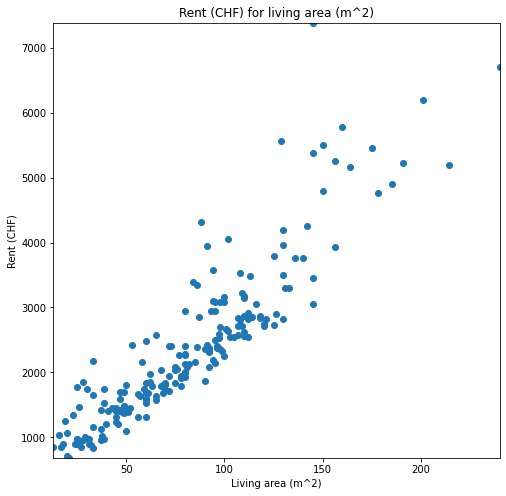

In [46]:
# Your code here
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
ax.scatter(living_area, rent_price)
ax.set_xlabel("Living area (m^2)")
ax.set_ylabel("Rent (CHF)")
plt.title("Rent (CHF) for living area (m^2)")
plt.xlim(np.min(living_area), np.max(living_area))
plt.ylim(np.min(rent_price), np.max(rent_price))

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

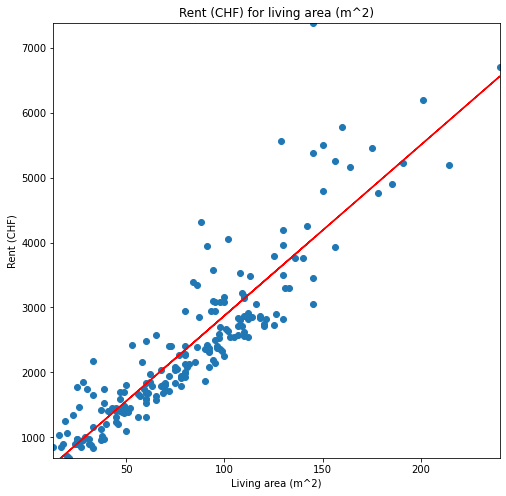

In [47]:
# Your code here
X = np.c_[np.ones(np.shape(living_area)[0]), living_area]
y = rent_price
best_theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)

predicted_values = np.dot(X, best_theta)

ax.plot(living_area, predicted_values, c='red')
fig

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [48]:
# Your code here
def compute_cost(x, y, N, theta):
    a = 1 / (2 * N)
    b = np.sum((np.dot(x, theta) - y) ** 2)
    return (a) * (b)

N = np.shape(y)[0]
theta = np.zeros([2, 1])

initial_cost = compute_cost(X, y, N, theta)
print(initial_cost)

0.0024875621890547263
289680840813.0
720599106.5


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

tensor(7.2060e+08)


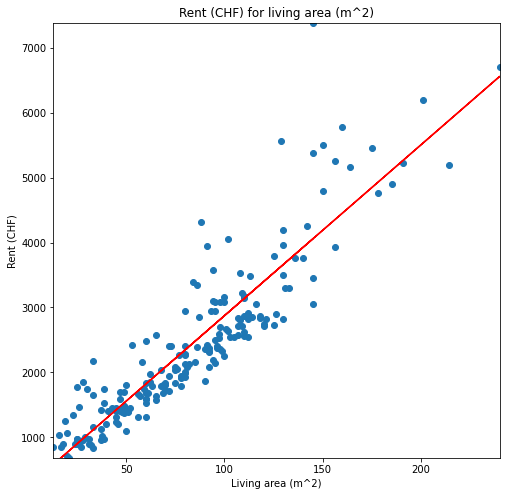

In [53]:
# Your code here
living_areas = torch.from_numpy(living_area)
rent_prices = torch.from_numpy(rent_price)

X = torch.stack((torch.ones(living_areas.size()[0]), living_areas), 1)
y = rent_prices

thetas = torch.mv(
    torch.mm(
        torch.linalg.inv(
            torch.mm(
                torch.transpose(X, 0, 1), X
            )
        ), torch.transpose(X, 0, 1)
    ), y.type(torch.FloatTensor)
)

predicted_values = torch.mv(X, thetas)

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
ax.scatter(living_areas, rent_prices)
ax.set_xlabel("Living area (m^2)")
ax.set_ylabel("Rent (CHF)")
plt.title("Rent (CHF) for living area (m^2)")
plt.xlim(torch.min(living_areas), torch.max(living_areas))
plt.ylim(torch.min(rent_prices), torch.max(rent_prices))
ax.plot(living_areas, predicted_values, c='red')

def compute_cost(x, y, N, theta):
    a = 1 / (2 * N)
    b = torch.sum((torch.mm(x, theta) - y) ** 2)
    return (a) * (b)

N = y.size()[0]
theta = torch.zeros([2, 1])

initial_cost = compute_cost(X, y, N, theta)
print(initial_cost)